In [1]:
#! pip install pandas-profiling

In [2]:
import numpy as np
import pandas as pd
import time
import plotly.graph_objects as go
import swifter
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import datetime as dt
from prettytable import PrettyTable
import math
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import import_ipynb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df_artists = pd.read_csv('Csv/artists.csv')
df = pd.read_csv('Csv/joined_tracks_artists.csv')

df.head()

id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  instrumentalness  liveness  \
0   1922-02-22         0.645  0.4450  ...            0.7440     0.151   
1   1922-06-01         0.695  0.2630  ...            0.0000     0.148   
2   1922-03-21         0.434  0.1770  ...            0.0218     0.212   
3   1922-03-21         0.321  0.0946  ...            0.9180     0.104   
4         1922         0.402  0.1580  ...            0.1300     0.311   

   valence    tempo  time_signature  #artists  artist_followers  \
0    0.127  104.851               3         1            [91.0]   
1    0.655  102.009               1         1             [3.0]   
2    0.457  130.418               5         1          [3528.0]   
3    0.397  169.980               3         1          [3528.0]   
4    0.196  103.220               4         1         [11327.0]   

   artist_popularity  combined_followers  combined_popularity  
0                [4]                91.0                  4.0  
1                [0]                 3.0                  0.0  
2               [23]              3528.0                 23.0  
3               [23]              3528.0                 23.0  
4               [35]             11327.0                 35.0  

[5 rows x 25 columns]

In [4]:
df.shape

(586672, 25)

In [5]:
fig = go.Figure(data=[go.Histogram(x=df['popularity'])])
fig.show()

##### Null-Values

In [6]:
df.isnull().sum()

id                         0
name                      71
popularity                 0
duration_ms                0
explicit                   0
artists                    0
id_artists                 0
release_date               0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
#artists                   0
artist_followers           0
artist_popularity          0
combined_followers     11057
combined_popularity    11055
dtype: int64

In [7]:
initial_n_rows  = df.shape[0]
df = df.dropna()
final_n_rows = df.shape[0]
print(f"{initial_n_rows - final_n_rows} rows dropped")

11057 rows dropped


In [8]:
df.shape

(575615, 25)

In [9]:
df['id_artists'] = df['id_artists'].apply(eval)
df['artists'] = df['artists'].apply(eval)
df['artist_followers'] = df['artist_followers'].apply(eval)
df['artist_popularity'] = df['artist_popularity'].apply(eval)


#### Labeling the classes

In [10]:
quantile = 0.9
threshold = df['popularity'].quantile(quantile)
df['label'] = df['popularity'] >= threshold
df['label'] = df['label'].astype(int)

In [11]:
df.sort_values(by='popularity', ascending=False).head()

id                                    name  \
93802  4iJyoBOLtHqaGxP12qzhQI  Peaches (feat. Daniel Caesar & Giveon)   
93803  7lPN2DXiMsVn7XUKtOW1CS                         drivers license   
93804  3Ofmpyhv5UAQ70mENzB277                  Astronaut In The Ocean   
92810  5QO79kh1waicV47BqGRL3g                         Save Your Tears   
92811  6tDDoYIxWvMLTdKpjFkc1B                               telepatía   

       popularity  duration_ms  explicit  \
93802         100       198082         1   
93803          99       242014         1   
93804          98       132780         0   
92810          97       215627         1   
92811          97       160191         0   

                                      artists  \
93802  [Justin Bieber, Daniel Caesar, Giveon]   
93803                        [Olivia Rodrigo]   
93804                           [Masked Wolf]   
92810                            [The Weeknd]   
92811                            [Kali Uchis]   

                                              id_artists release_date  \
93802  [1uNFoZAHBGtllmzznpCI3s, 20wkVLutqVOYrc0kxFs7r...   2021-03-19   
93803                           [1McMsnEElThX1knmY4oliG]   2021-01-08   
93804                           [1uU7g3DNSbsu0QjSEqZtEd]   2021-01-06   
92810                           [1Xyo4u8uXC1ZmMpatF05PJ]   2020-03-20   
92811                           [1U1el3k54VvEUzo3ybLPlM]   2020-12-04   

       danceability  energy  ...  liveness  valence    tempo  time_signature  \
93802         0.677   0.696  ...     0.420    0.464   90.030               4   
93803         0.585   0.436  ...     0.105    0.132  143.874               4   
93804         0.778   0.695  ...     0.150    0.472  149.996               4   
92810         0.680   0.826  ...     0.543    0.644  118.051               4   
92811         0.653   0.524  ...     0.203    0.553   83.970               4   

       #artists                   artist_followers  artist_popularity  \
93802         3  [44606973.0, 2588034.0, 946550.0]      [100, 91, 89]   
93803         1                        [1444702.0]               [88]   
93804         1                         [177401.0]               [85]   
92810         1                       [31308207.0]               [96]   
92811         1                        [1698014.0]               [88]   

       combined_followers  combined_popularity  label  
93802        4.621651e+07           175.166667      1  
93803        1.444702e+06            88.000000      1  
93804        1.774010e+05            85.000000      1  
92810        3.130821e+07            96.000000      1  
92811        1.698014e+06            88.000000      1  

[5 rows x 26 columns]

In [12]:
print(f"{round(df['label'].sum() * 100 / df.shape[0],2)}% of observations have label == 1 and are thus in the percentile 90.")

10.03% of observations have label == 1 and are thus in the percentile 90.


#### Extract Year, Month, Day, Quarter, Epoch

In [13]:
# Extract date into different columns.

df['release_date'] = pd.to_datetime(df['release_date'])


df['release_month'] = df['release_date'].dt.month

df['release_day'] = df['release_date'].dt.day


# EDA

In [14]:
popularity = df['popularity']
print(list(df.columns))
columns = ['duration_ms', 'explicit', 'danceability', 'energy','key' ,'loudness','mode' ,'speechiness', 'acousticness', 'instrumentalness','liveness','valence','tempo','time_signature' ,'#artists', 'combined_followers', 'release_month', 'release_day', 'label']

['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists', 'id_artists', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', '#artists', 'artist_followers', 'artist_popularity', 'combined_followers', 'combined_popularity', 'label', 'release_month', 'release_day']


In [15]:
df = df[columns]
df.to_csv("Csv/spotify_preprocessed.csv", index=False)

In [16]:
df.head()

duration_ms  explicit  danceability  energy  key  loudness  mode  \
0       126903         0         0.645  0.4450    0   -13.338     1   
1        98200         0         0.695  0.2630    0   -22.136     1   
2       181640         0         0.434  0.1770    1   -21.180     1   
3       176907         0         0.321  0.0946    7   -27.961     1   
4       163080         0         0.402  0.1580    3   -16.900     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.4510         0.674            0.7440     0.151    0.127  104.851   
1       0.9570         0.797            0.0000     0.148    0.655  102.009   
2       0.0512         0.994            0.0218     0.212    0.457  130.418   
3       0.0504         0.995            0.9180     0.104    0.397  169.980   
4       0.0390         0.989            0.1300     0.311    0.196  103.220   

   time_signature  #artists  combined_followers  release_month  release_day  \
0               3         1                91.0              2           22   
1               1         1                 3.0              6            1   
2               5         1              3528.0              3           21   
3               3         1              3528.0              3           21   
4               4         1             11327.0              1            1   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

### Data Types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575615 entries, 0 to 586671
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_ms         575615 non-null  int64  
 1   explicit            575615 non-null  int64  
 2   danceability        575615 non-null  float64
 3   energy              575615 non-null  float64
 4   key                 575615 non-null  int64  
 5   loudness            575615 non-null  float64
 6   mode                575615 non-null  int64  
 7   speechiness         575615 non-null  float64
 8   acousticness        575615 non-null  float64
 9   instrumentalness    575615 non-null  float64
 10  liveness            575615 non-null  float64
 11  valence             575615 non-null  float64
 12  tempo               575615 non-null  float64
 13  time_signature      575615 non-null  int64  
 14  #artists            575615 non-null  int64  
 15  combined_followers  575615 non-nul

### PCA


In [18]:
pd.set_option('display.max_columns', None)
df.head()

duration_ms  explicit  danceability  energy  key  loudness  mode  \
0       126903         0         0.645  0.4450    0   -13.338     1   
1        98200         0         0.695  0.2630    0   -22.136     1   
2       181640         0         0.434  0.1770    1   -21.180     1   
3       176907         0         0.321  0.0946    7   -27.961     1   
4       163080         0         0.402  0.1580    3   -16.900     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.4510         0.674            0.7440     0.151    0.127  104.851   
1       0.9570         0.797            0.0000     0.148    0.655  102.009   
2       0.0512         0.994            0.0218     0.212    0.457  130.418   
3       0.0504         0.995            0.9180     0.104    0.397  169.980   
4       0.0390         0.989            0.1300     0.311    0.196  103.220   

   time_signature  #artists  combined_followers  release_month  release_day  \
0               3         1                91.0              2           22   
1               1         1                 3.0              6            1   
2               5         1              3528.0              3           21   
3               3         1              3528.0              3           21   
4               4         1             11327.0              1            1   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [19]:
dependent_variables=['duration_ms', 'explicit', 'danceability', 'energy','key' ,'loudness','mode' ,
'speechiness', 'acousticness', 'instrumentalness','liveness','valence','tempo','time_signature' ,
'#artists', 'combined_followers', 'release_month', 'release_day']


x = df.loc[:, dependent_variables].values
x = StandardScaler().fit_transform(x)

In [20]:
#Reducing dimensions to two (for visualization) for this dataset is not raliable,
#because there is too much loss of variance
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.17491115, 0.08903824])

In [21]:
#Dimensionality reduction to the highest number of dimensions while keeping the variance .95
pca = PCA(.95)
pca.fit(x)
pca.n_components_

16

In [22]:
PCA_tracks_df = pca.transform(x)
spotify_pca = pd.DataFrame(PCA_tracks_df)
spotify_pca.to_csv("Csv/spotify_pca.csv")

In [23]:
pca.explained_variance_ratio_


array([0.17491118, 0.08904273, 0.08328344, 0.06744214, 0.06533982,
       0.06184654, 0.05510857, 0.05195649, 0.04988672, 0.04925912,
       0.04735444, 0.04527568, 0.04422815, 0.03685077, 0.02553393,
       0.02439159])

In [24]:
pca.components_

array([[ 2.84521803e-02, -1.31392087e-01, -2.87284536e-01,
        -4.84603113e-01, -3.16524091e-02, -4.59374228e-01,
         4.91897589e-02,  2.52267799e-02,  4.23586425e-01,
         2.37456071e-01, -1.92006498e-02, -2.91637621e-01,
        -1.60156598e-01, -1.63150002e-01,  1.25096068e-01,
        -9.26454477e-02, -1.55540845e-01, -1.65970481e-01],
       [ 3.29793708e-01,  7.72570566e-02, -3.79254811e-01,
         5.17780197e-02,  1.97373192e-02,  8.45514128e-02,
        -7.45615783e-02, -3.07268965e-01, -1.03644134e-01,
         1.84573114e-01, -2.66332331e-02, -4.20738380e-01,
         7.17105988e-02,  2.86633362e-02,  1.12443451e-01,
         2.15089070e-01,  4.12406125e-01,  4.16834539e-01],
       [ 2.35990523e-01, -2.49972326e-01, -2.61752871e-01,
         1.59318933e-01, -1.41635152e-02,  1.43671543e-01,
         6.71599353e-02, -4.79161159e-01, -1.56411534e-01,
         9.80340854e-02, -1.25998661e-01, -2.99784485e-02,
         2.52868105e-01,  1.52788878e-01, -1.14245070e

#### Most important feature of each PCA

In [25]:
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = dependent_variables
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
pd.DataFrame(dic.items())

0                 1
0    PC0            energy
1    PC1           valence
2    PC2       speechiness
3    PC3          liveness
4    PC4          liveness
5    PC5               key
6    PC6    time_signature
7    PC7          #artists
8    PC8               key
9    PC9       duration_ms
10  PC10              mode
11  PC11  instrumentalness
12  PC12       duration_ms
13  PC13       speechiness
14  PC14     release_month
15  PC15      acousticness

### Central Tendency & Dispersion

In the analysis of central tendency and dispersion we discriminate between the two classes to make out any differences.

#### Descriptive Statistical Summary - without discrimination

In [26]:
descr_sum = df.describe()
descr_sum

duration_ms       explicit   danceability         energy  \
count  5.756150e+05  575615.000000  575615.000000  575615.000000   
mean   2.298133e+05       0.043963       0.563284       0.541591   
std    1.216161e+05       0.205014       0.165723       0.251675   
min    3.344000e+03       0.000000       0.000000       0.000000   
25%    1.753200e+05       0.000000       0.453000       0.343000   
50%    2.149730e+05       0.000000       0.577000       0.548000   
75%    2.638670e+05       0.000000       0.685000       0.748000   
max    5.621218e+06       1.000000       0.991000       1.000000   

                 key       loudness           mode    speechiness  \
count  575615.000000  575615.000000  575615.000000  575615.000000   
mean        5.220971     -10.198430       0.659246       0.105145   
std         3.517971       5.079905       0.473963       0.180761   
min         0.000000     -60.000000       0.000000       0.000000   
25%         2.000000     -12.887000       0.000000       0.033900   
50%         5.000000      -9.239000       1.000000       0.044200   
75%         8.000000      -6.475000       1.000000       0.076200   
max        11.000000       5.376000       1.000000       0.971000   

        acousticness  instrumentalness       liveness        valence  \
count  575615.000000     575615.000000  575615.000000  575615.000000   
mean        0.451355          0.110229       0.214291       0.553002   
std         0.348416          0.263113       0.184597       0.257223   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.099200          0.000000       0.098400       0.347000   
50%         0.425000          0.000023       0.139000       0.564000   
75%         0.785000          0.008520       0.278000       0.770000   
max         0.996000          1.000000       1.000000       1.000000   

               tempo  time_signature      #artists  combined_followers  \
count  575615.000000   575615.000000  575615.00000        5.756150e+05   
mean      118.435923        3.873302       1.29415        1.245136e+06   
std        29.762549        0.472106       0.87521        4.403875e+06   
min         0.000000        0.000000       1.00000        0.000000e+00   
25%        95.528000        4.000000       1.00000        1.401400e+04   
50%       117.231000        4.000000       1.00000        1.084130e+05   
75%       136.324500        4.000000       1.00000        6.601412e+05   
max       246.381000        5.000000      58.00000        1.031197e+08   

       release_month    release_day         label  
count  575615.000000  575615.000000  575615.00000  
mean        4.423481       8.756242       0.10027  
std         3.982752       9.900203       0.30036  
min         1.000000       1.000000       0.00000  
25%         1.000000       1.000000       0.00000  
50%         2.000000       1.000000       0.00000  
75%         8.000000      16.000000       0.00000  
max        12.000000      31.000000       1.00000

#### Descriptive Statistical Summary - with discrimination

In [27]:
df_regular = df.loc[df['label']==0]
df_regular_descr = df_regular.describe()
#df_regular_descr.to_csv("Csv/Regular_descr.csv")

df_hit = df.loc[df['label']==1]
df_hit_descr = df_hit.describe()
#df_hit_descr.to_csv("Csv/Hit_descr.csv")

description_joined = pd.DataFrame() 
for col_name in list(df_hit_descr.columns):
    description_joined["Hit_"+col_name] =  df_hit_descr[col_name]
    description_joined["Regular_"+col_name] =  df_regular_descr[col_name]
#description_joined.to_csv('Csv/Descriminative_Discription.csv')
description_joined

Hit_duration_ms  Regular_duration_ms  Hit_explicit  Regular_explicit  \
count     5.771700e+04         5.178980e+05  57717.000000     517898.000000   
mean      2.277964e+05         2.300380e+05      0.173017          0.029581   
std       7.464944e+04         1.257668e+05      0.378265          0.169429   
min       3.062200e+04         3.344000e+03      0.000000          0.000000   
25%       1.884000e+05         1.734670e+05      0.000000          0.000000   
50%       2.187330e+05         2.143600e+05      0.000000          0.000000   
75%       2.549600e+05         2.650000e+05      0.000000          0.000000   
max       4.581483e+06         5.621218e+06      1.000000          1.000000   

       Hit_danceability  Regular_danceability    Hit_energy  Regular_energy  \
count      57717.000000         517898.000000  57717.000000   517898.000000   
mean           0.620976              0.556854      0.636556        0.531007   
std            0.160553              0.165045      0.209754        0.253730   
min            0.000000              0.000000      0.000020        0.000000   
25%            0.518000              0.446000      0.501000        0.329000   
50%            0.635000              0.570000      0.662000        0.533000   
75%            0.739000              0.679000      0.800000        0.739000   
max            0.988000              0.991000      1.000000        1.000000   

            Hit_key    Regular_key  Hit_loudness  Regular_loudness  \
count  57717.000000  517898.000000  57717.000000     517898.000000   
mean       5.308921       5.211169     -7.429520        -10.507011   
std        3.574368       3.511497      3.944564          5.098790   
min        0.000000       0.000000    -50.174000        -60.000000   
25%        2.000000       2.000000     -8.843000        -13.231000   
50%        5.000000       5.000000     -6.596000         -9.624000   
75%        8.000000       8.000000     -4.966000         -6.759000   
max       11.000000      11.000000      1.634000          5.376000   

           Hit_mode   Regular_mode  Hit_speechiness  Regular_speechiness  \
count  57717.000000  517898.000000     57717.000000        517898.000000   
mean       0.627008       0.662839         0.090262             0.106804   
std        0.483604       0.472741         0.094554             0.187862   
min        0.000000       0.000000         0.000000             0.000000   
25%        0.000000       0.000000         0.034800             0.033900   
50%        1.000000       1.000000         0.049200             0.043800   
75%        1.000000       1.000000         0.098700             0.074000   
max        1.000000       1.000000         0.944000             0.971000   

       Hit_acousticness  Regular_acousticness  Hit_instrumentalness  \
count      57717.000000         517898.000000          57717.000000   
mean           0.286826              0.469691              0.046864   
std            0.282111              0.350285              0.172751   
min            0.000000              0.000000              0.000000   
25%            0.042700              0.113000              0.000000   
50%            0.188000              0.464000              0.000002   
75%            0.477000              0.806000              0.000393   
max            0.996000              0.996000              1.000000   

       Regular_instrumentalness  Hit_liveness  Regular_liveness   Hit_valence  \
count             517898.000000  57717.000000     517898.000000  57717.000000   
mean                   0.117291      0.186178          0.217424      0.528989   
std                    0.270408      0.157752          0.187089      0.243866   
min                    0.000000      0.000000          0.000000      0.000000   
25%                    0.000000      0.094200          0.098900      0.337000   
50%                    0.000030      0.123000          0.141000      0.530000   
75%                    0.012100      0.227000          0.283

#### Histogram per Variable - without discrimination

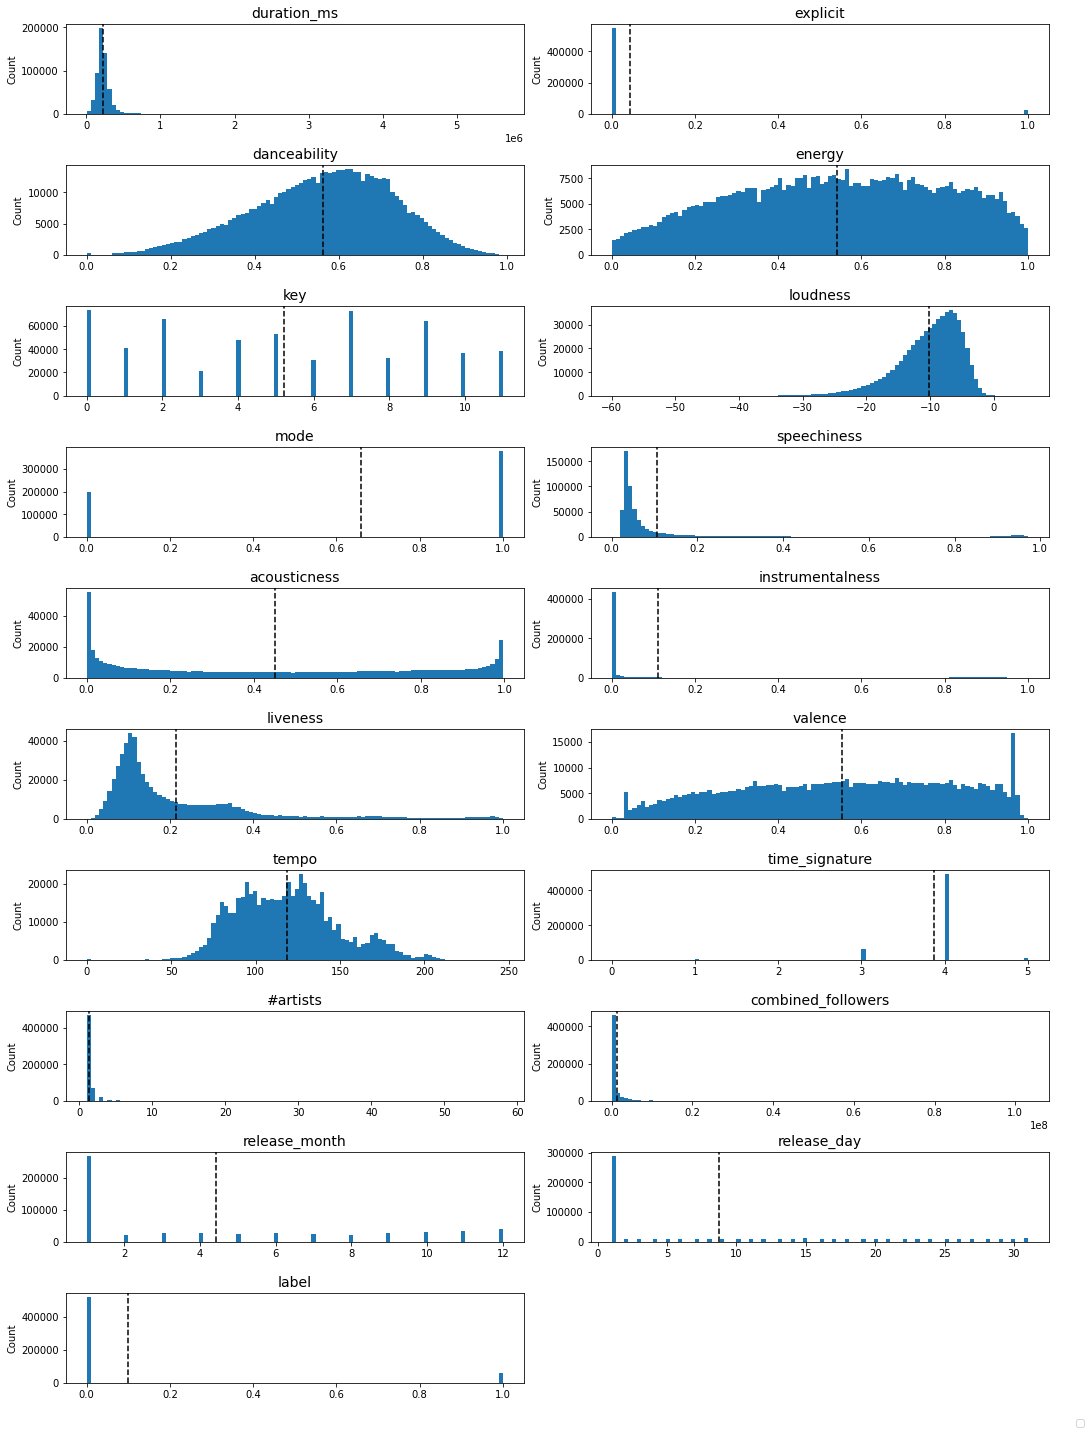

In [28]:
def mulitple_hist(columns, n_col = 2):
    n_row = math.ceil(len(columns)/2)
    column_index = 0
    fig, axes = plt.subplots(n_row, n_col, figsize=(15,20))
    fig.tight_layout(pad=3.0)
    #plt.figtext(x=0.5, y=1.01, s='Mean: ----',ha='center', va='center', fontsize= 15)
    #fig.suptitle('Variable specific Histograms',y=1.04, fontsize= 16)
    if len(columns)%2 >0:  
        fig.delaxes(axes[n_row-1][n_col-1])

    for col, ax in zip(columns, axes.flatten()):
            #sns.histplot(df[col], ax=ax, bins=len(np.unique(df[col]))//2, kde= True)
            ax.hist(df[col], bins= 100)
            ax.set_title(col, fontsize=14)
            #ax.set_xlabel('Value')
            ax.set_ylabel('Count')
            mean_line = ax.axvline(df[col].mean(), color='black', linestyle='--')
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower right' )
    plt.show()

continous_columns = df.columns[df.dtypes != 'object']
selected_columns = continous_columns.drop(['explicit','label', 'mode','time_signature',"#artists", "key", 'release_day',"release_month"])
mulitple_hist(continous_columns)

#### BloxPlot per Variable - with discrimination

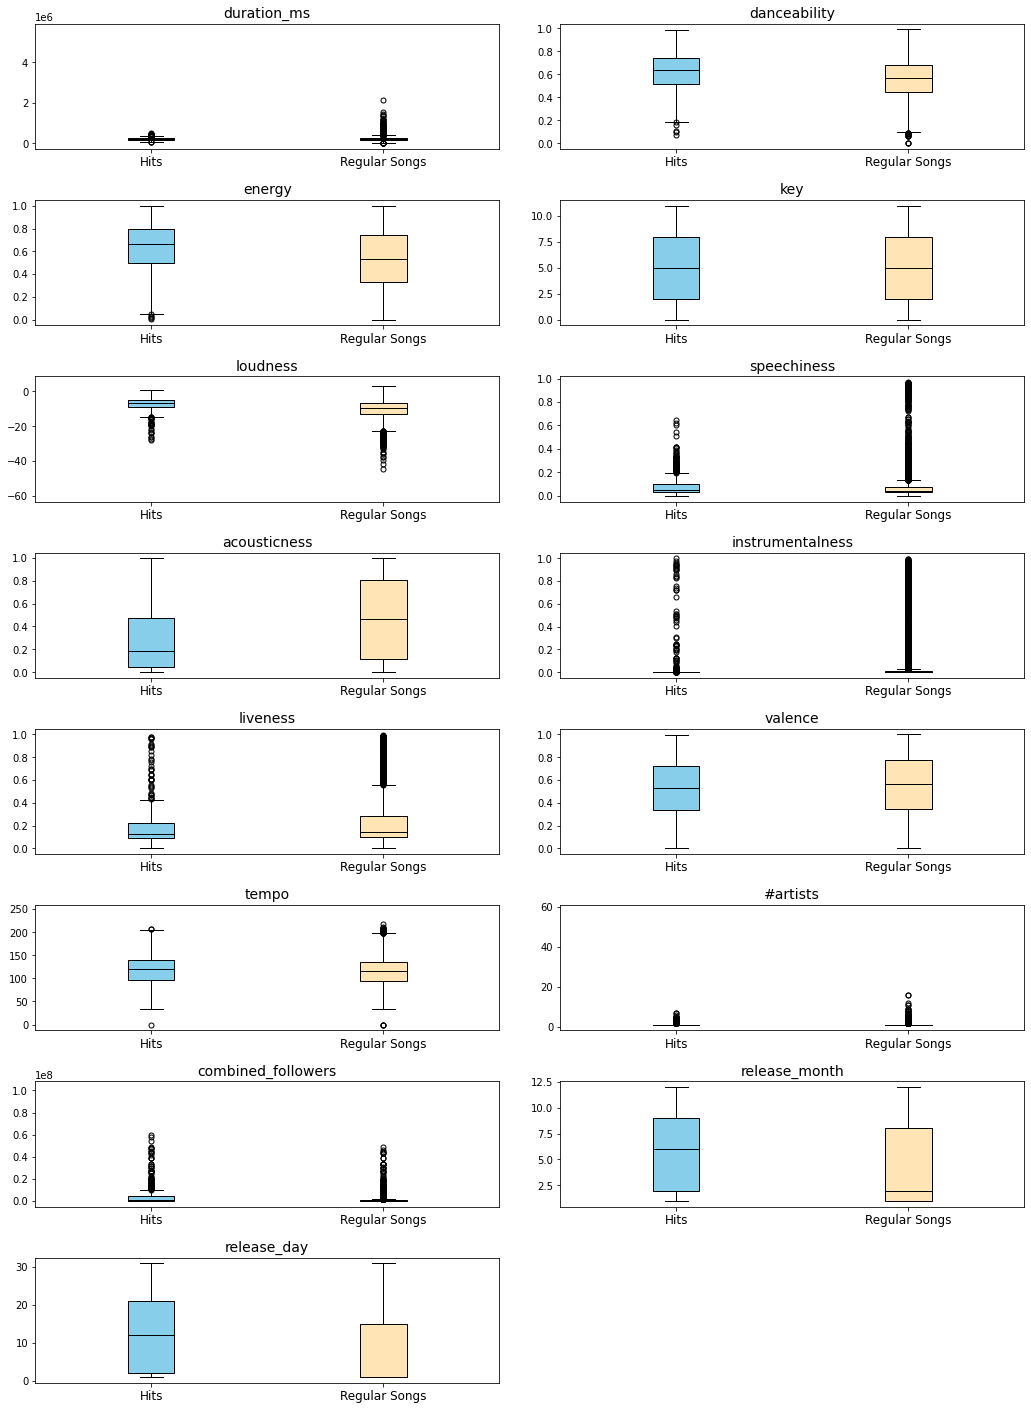

In [29]:

def mulitple_boxplot(columns, n_col = 2):
    n_row = math.ceil(len(columns)/2)
    column_index = 0
    fig, axes = plt.subplots(n_row, n_col, figsize=(15,20))
    fig.tight_layout(pad=3.0)
    flierprops = dict(marker='o', markersize=5,markevery = 100) #Outlier-Layout
    if len(columns)%2 >0:  
        fig.delaxes(axes[n_row-1][n_col-1])
    for col, ax in zip(columns, axes.flatten()):
            bplot = ax.boxplot([df_hit[col], df_regular[col]],patch_artist=True , widths = 0.2, flierprops = flierprops)
            ax.set_title(col, fontsize=14)
            ax.set_xticklabels(["Hits","Regular Songs"], fontsize=12)

            for box, color in zip(bplot["boxes"],["skyblue","moccasin"]): #coloring of the boxes
                box.set_facecolor(color)
            
            for median in bplot["medians"]: # coloring of the median line
                plt.setp(median, color="black")


    plt.show()

numerical_columns = df.columns[df.dtypes != 'object']
#selected_columns = numerical_columns.drop(['explicit','label', 'mode','duration_ms','time_signature',"#artists", "instrumentalness", "key", "speechiness", "liveness","valence","tempo"])
selected_columns = numerical_columns.drop(['explicit','label', 'mode', "time_signature"])
mulitple_boxplot(selected_columns)

#### Outlier-Detection


In [30]:
from OutlierDetection import OutlierDetection

importing Jupyter notebook from OutlierDetection.ipynb


In [31]:
#OutlierDetection.iqr_summary(df)

##### 2. Z-Score

In [32]:
#OutlierDetection.visualize_zscore(df)

#### 3. KNN

--> Benchmark for global outlier detection

In [33]:
#explanatory_variables= continous_columns.drop('popularity')

In [34]:
#knn_array = OutlierDetection.knn(df, explanatory_variables)
#outliers_knn = OutlierDetection.visualize_knn_outliers(df, explanatory_variables, knn_array)

##### 4. LOF - Local Outlier Factor

In [35]:
#explanatory_variables= continous_columns.drop('popularity')
#lof,outlier_index = OutlierDetection.lof(df,explanatory_variables, n = 50)

#### Remove Outliers

### Exploring correlations 

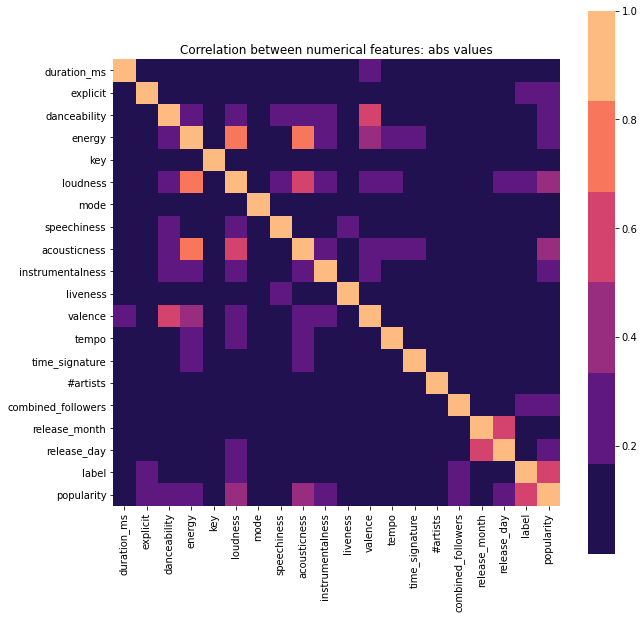

In [36]:
numeric_columns = df.columns[df.dtypes != 'object']
string_columns = df.columns[df.dtypes == 'object']
numeric_df = pd.DataFrame(data=df, columns=numeric_columns, index=df.index)
numeric_df["popularity"] = popularity
corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("magma")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features: abs values')
plt.show()

In [37]:
# joined_df = pd.read_csv('joined_tracks_artists.csv')

#### Linear relations between independant variables and Popularity

In order to understand possible linear relations between independant variables and the dependant variable *Popularity*, we fit one linear regression with each independant variable and *Popularity*.

A good linear regression fitting would be necessary to conclude the existance of a linear relation, but not sufficient. Therefore, variables that show poor fitting can be discarded the existance of a linear relation. 


In [38]:
continous_columns_filtered = [column for column in continous_columns if column not in ["popularity", 'label']]
size = int(len(continous_columns_filtered) / 3)
#df_pop = df[['danceability', 'energy' ,'loudness','speechiness', 'instrumentalness','liveness','tempo']]
df_pop = df[:]
columns_selected = df_pop.columns
print(df_pop.columns)
df_pop["popularity"] = popularity
if len(continous_columns_filtered) % 3 != 0:
    size+=1
    

positions = []
for x in range(1, size + 1):
    for y in range(1, 4):
        positions.append((x,y))

fig = make_subplots(rows=size, cols=3, start_cell="bottom-left")

r_score_dict = {}

for column in continous_columns_filtered:
    X = df_pop[column].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, df_pop.popularity)
    r_score_dict[column] = model.score(X, df_pop.popularity)

    x_range = np.linspace(X.min(), X.max(), 10)
    y_range = model.predict(x_range.reshape(-1, 1))
    row, col = positions.pop()
    n_samples = 1000
    sample = df_pop.sample(n_samples)
    sample_x = sample[column]
    sample_y = sample['popularity']
    fig.add_trace(go.Scatter(x=sample_x, y=sample_y, mode='markers', marker_color='rgba(255, 165, 0, .8)'),
    row=row, col=col
    )

    fig.add_trace(go.Scatter(x=x_range, y=y_range, name='Regression Fit', mode='lines', marker_color='rgba(152, 0, 0, .8)'),
    row=row, col=col
    )
    fig.update_yaxes(title_text="Popularity", row=row, col=col)
    fig.update_xaxes(title_text=column.title(), row=row, col=col)

fig.update_layout(
    autosize=False,
    width=800,
    height=500*size,
    showlegend=False
)


fig.update_layout(
    title="Linear Regression to explain Popularity by each column",
)

fig.show()


fig = go.Figure(go.Bar(
    y=[key for key in r_score_dict.keys()],
    x=[item for item in r_score_dict.values()],
    orientation='h'))

fig.update_layout(barmode='stack', yaxis={'categoryorder':'total descending'})

fig.update_layout(
    title="R2 of Linear Regression by column",
)

fig.show()

Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', '#artists', 'combined_followers',
       'release_month', 'release_day', 'label'],
      dtype='object')
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Variables with a lower `R2` score are very unlikely to show a linear relation towards popularity. On the other hand, variables with higher score there is a higher chance that it might exist a linear relation. Therefore it is possible to discard any linear relation for columns as valence, key, duration_ms, speechiness, liveness.

Nevertheless a strong `R2` does not mean a strong linear relation *per se* as there could be other relations between independent and dependent variable (exponential, polynomial etc.)

### Balancedness of data

In [39]:
fig = go.Figure(data=[go.Histogram(x=[str(int(label)) for label in df['label']], histnorm='probability')])

fig.update_layout(
    title_text='Label Class Probability',
    xaxis_title_text='Class', # xaxis label
    yaxis_title_text='Probability', # yaxis label
    bargap=0.2,
    bargroupgap=0.1
)

The data clearly indicates an <u>imbalanced class distribution</u>. This can lead to unsatisfying results regarding the prediction of a class.

- comparison of the performance of LogReg, SVM, Random Forest and ANN in a Spotify Hit classification problem

- try to optimize all the hyperparameters for each model benchmarking performance (grid search)

- analyze why models work best with respective input and configuration

- what are the benefits & drawbacks of each model

#### Drop Columns that we will not use to predict

Through PCA/Feature Engineering drop columns that we will not use, prior to split train, validate, test.
Split will asume that only columns relevant are present in `df`.

#### Split Dataset in Train, Validate, Test
60/20/20

In [40]:
def split_dataset(df=df, sample=1):
    df = df.sample(int(sample * df.shape[0]))
    train, validate, test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])

    print(f" Train: {train.shape}\n", f"Validate: {validate.shape}\n", f"Test: {test.shape}\n")

    Xtrain = train.loc[:, df.columns != 'label']

    Xvalidate = validate.loc[:, df.columns != 'label']

    Xtest = test.loc[:, df.columns != 'label']


    ytrain = train.label.values.ravel()

    yvalidate = validate.label.values.ravel()

    ytest = test.label.values.ravel()

    return Xtrain, Xvalidate, Xtest, ytrain, yvalidate, ytest

Xtrain, Xvalidate, Xtest, ytrain, yvalidate, ytest = split_dataset(df, sample=0.005)

 Train: (1726, 19)
 Validate: (576, 19)
 Test: (576, 19)



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=efdb1931-d19c-4850-b12b-726a7087f8c0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>